# Deep Learning

### plot settings

In [117]:
# plot settings
import matplotlib as mpl
color = mpl.cycler(color=['#4b6584', '#e1b12c', '#079992', '#00a8ff', '#e84118', '#badc58']); mpl.rcParams['axes.prop_cycle'] = color
mpl.rcParams.update({
    'axes.labelsize': 17.6,
    'axes.spines.bottom': True,
    'axes.spines.left': True,
    'axes.spines.right': False,
    'axes.spines.top': False, 
    'axes.titlesize': 19.8,
    'figure.figsize': [12,4],
    'figure.titlesize': 'large',
    'font.size': 10,
    'legend.fontsize': 16,
    'lines.linewidth': 2.8,
    'lines.markersize': 11.2,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16
})

### function to generate training data

In [118]:
def get_data_poly_noise(xmin, xmax, noise_rel=0.1, N=50, poly_order=1):
    
    x = (xmax - xmin) * np.random.random_sample(size=N) + xmin          # N random datapoints between ymin and ymax
    poly_coeff = 10 * np.random.random_sample(size=poly_order+1) - 5    # coefficients for the polynomial in [-5,5]
    
    #create polynomial
    y = np.zeros(x.shape)
    for i in range(poly_order+1):
        y += poly_coeff[i] * x**i
    
    noise_mag = noise_rel * np.abs((np.max(y) - np.min(y)))
    #add noise in [-noise_mag/2, noise_mag/2]
    y += noise_mag * np.random.random_sample(size=N) - noise_mag/2
    
    return (x, y)

# Content
- Linear Models
- K Nearest Neighbour Regression

## 13.04.2018

### In General
- Scikir-learn (classical machine learning)
- TensorFLow (von Google, deep learning, somehow ugly)
- Keras & TFlearn (on top of tensor flow, much nicer)
- NVIDIA GPUs enable parallel processing, neuronal networks do matrix multiplications
- Amazon Web Service (AWS)

### Linear Models
- given x and y (learn f(x) to get reasonable y' given x'
- Speech perception
- Training set: pairs of x, y
- Then its about finding the right slope and intercept


The slopes is -1.29533292555
The intercept is -4.93357810437


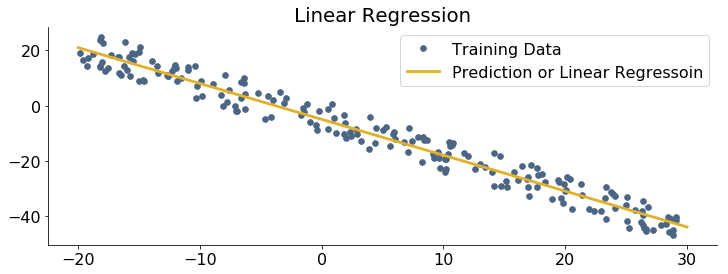

In [119]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

xmin, xmax = -20, 30      # minimum, maximum of X
poly_order = 1            # Order of the polynomial
N_train    = 200          # Number training points

# create training data
(x_train, y_train) = get_data_poly_noise(xmin=xmin, xmax=xmax, N=N_train, noise_rel=0.2, poly_order=poly_order)
# create testing data
x_test = np.linspace(start=xmin, stop=xmax, num=1000)

# Linear regression:
################################################################################################################################
lm = linear_model.LinearRegression() # estimate m and b (that we of course would not know in real life) with a linear model from sklearn
lm.fit(x_train.reshape(-1, 1), y_train) 
print("The slopes is %s" %lm.coef_[0])
print("The intercept is %s" %lm.intercept_)
y_predict = lm.predict(x_test.reshape(-1, 1))

# why .reshape(-1, 1)?
# X needs to be transformed from [1, 2, 3, ... 299] to [[0], [1], [2], ... [299]], because:
# X -> [[feature1, feature2], [feature1, feature2], [feature1, feature2]] => here: three datapoints
# Y -> [outcome for datapoint 1, outcome for datapoint 2, for datapoint 3]

# plot training data and linear regression line (the prediction)
plt.plot(x_train, y_train, '.', label='Training Data')
plt.plot(x_test, y_predict, label='Prediction or Linear Regressoin')
plt.title('Linear Regression');
plt.legend()
plt.show()

## 27.04.2018

### Neighbours-based regression
- When data is  continuous rather than discrete
- One regression point is computed based the mean of its nearest neighbors.
    - **KNeighborsRegressor** implements learning based on the k nearest neighbors of each query point
    - **RadiusNeighborsRegressor** implements learning based on the neighbors within a fixed radius r of the query point
- *weights* define whether closer values influence regression stronger than values far away 
    - weights = 'uniform', assigns equal weights to all points.
    - weights = 'distance' assigns weights proportional to the inverse of the distance from the query point).

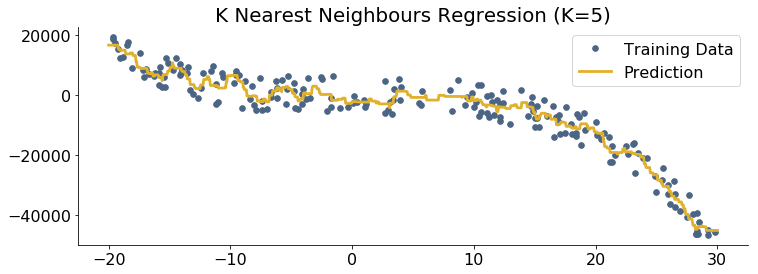

In [120]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors


K = 5                     # Number of considered neighbors
w_method   = 'uniform'    # Method for the weight of the data.
#w_method   = 'distance'

# create training data
xmin, xmax = -20, 30      # minimum, maximum of X
poly_order = 3            # Order of the polynomial
N_train    = 200          # Number training points
(x_train, y_train) = get_data_poly_noise(xmin=xmin, xmax=xmax, N=N_train, noise_rel=0.2, poly_order=poly_order)

# create testing data
x_test = np.linspace(start=xmin, stop=xmax, num=1000)


# K nearest neighbour regression
################################################################################################################################
neigh = neighbors.KNeighborsRegressor(n_neighbors=K, weights=w_method)
neigh.fit(x_train.reshape((-1,1)), y_train)
y_predict = neigh.predict(x_test.reshape((-1,1)))

# Plotting
plt.plot(x_train, y_train, '.', label='Training Data')
plt.plot(x_test, y_predict, '-', label='Prediction')
plt.legend()
plt.title('K Nearest Neighbours Regression (K=%s)' %K)
plt.show()